> # Titanic Survival Rate <br>


<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg?uselang=fr" width=350/>


RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the deadliest peacetime sinking of a superliner or cruise ship to date (source text:Wikipedia).
More information can be found on Wikipedia.

The current Jupyter workbook will look at the survival rate of the passengers, looking at different available features. It differs from other models available on the web, difference found on feature selection, model selection and hyperparameters selection.<br><br>
The aim of the study is to develop several models in order to see which model fits the best the passengers survival rate.<br><br>
The selected dataset for the ML study is coming from the following web site:<br>
(https://data.world/nrippner/titanic-disaster-dataset) <br>

It contains an incomplete list of only 1309 passengers, covering thus about 60% of the passengers who were present on board (the crew membersare not included in the dataset)

The dataset that will be used in this study contains the full features of the passengers list. Kaggle has also a
dataset with only a subset of features and data.

The roadmap for this study will be the following:

1. Data cleaning and Analysis
2. Data Quality and Features Engineering
3. ML Model selection
4. Conclusion 




### <font color='red'>1. Data Cleaning and Analysis</font>  <br><br>
Let's first look at some basic statistics regarding the data:


In [1]:
## Get the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://query.data.world/s/fn5xtho7ap6y7ivtkbpcejpqrhqyro')
df.columns = df.columns.str.lower()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Summary statistics:


In [3]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**The features are the following ones:**

survival - Survival (0 = No; 1 = Yes)  <font color='green'> This is the target variable </font>

1. pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
2. name - Name
3. sex - Sex
4. age - Age
5. sibsp - Number of Siblings/Spouses Aboard
6. parch - Number of Parents/Children Aboard
7. ticket - Ticket Number
8. fare - Passenger Fare
9. cabin - Cabin
10. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
11. boat - Lifeboat (if survived)
12. body - Body number (if did not survive and body was recovered)
13. home.dest - Home destination

We can beforehand discard a couple of features, as they do not have an impact on the survival rate:
<font color='green'>
- ticket number
- boat and body, these fields relate directly to the surval target field
- home.dest
</font>    
    Fields sibsp and parch only indicate if the siblings/parents are traveling together. They will be 
    replaced by another field indicating if the passenger was traveling alone or with his/her family.
    
That leaves us with 8 features and one target field (survival)


In [4]:

# Let's Create a field family to take into account if a passenger came with his/her family/sibling
# This feature is important in the sense that family members are more prone to help each other and thus 
# increase the survival rate.
df["family"]=df["sibsp"]+df["parch"]
# drop sibsp and parch fields
## Get rid of columns to discard:

df = df.drop(columns=['sibsp','parch','home.dest',
                      'body','ticket','boat'])
# Get a sample of the data
df.sample(5)



,pclass,survived,name,sex,age,fare,cabin,embarked,family
172,1.0,0.0,"Julian, Mr. Henry Forbes",male,50.0,26.0000,E60,S,0.0
1097,3.0,0.0,"Palsson, Master. Paul Folke",male,6.0,21.0750,NaN,S,4.0
145,1.0,1.0,"Harper, Mr. Henry Sleeper",male,48.0,76.7292,D33,C,1.0
101,1.0,0.0,"Dulles, Mr. William Crothers",male,39.0,29.7000,A18,C,0.0
290,1.0,0.0,"Taussig, Mr. Emil",male,52.0,79.6500,E67,S,2.0


A first look at the missing data shows that we can conduct a simple statistical analysis on the dataset<br>
before dealing with the missing data:

In [5]:
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
fare           2
cabin       1015
embarked       3
family         1
dtype: int64

A quick look at the tail examples shows that most of the NaN values are coming  from the last record.<br>
It will be deleted before a more complete analysis of the null values:

In [6]:
df.tail()
df = df.drop(index=1309)

_Survival rate per class:_

In [7]:
df.groupby(['pclass'])['survived'].mean()

pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64

_Survival rate per sex:_

In [8]:
df.groupby(['sex'])['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Survival rate per age. 

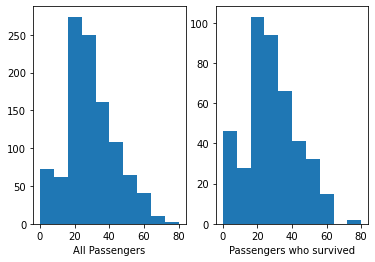

In [9]:
plt.subplot(1, 2, 1)
_ = plt.hist(df.age)
plt.xlabel("All Passengers")
plt.subplot(1,2,2)
_ = plt.hist(df[df["survived"]==1]["age"])
plt.xlabel("Passengers who survived")
plt.show()

Min and Max age in years of passengers 

In [10]:
(df.age.min(), df.age.max())

(0.1667, 80.0)

Is the port of embarkation correlated with the survival rate ?

In [11]:
df.groupby(['embarked'])['survived'].mean()

embarked
C    0.555556
Q    0.357724
S    0.332604
Name: survived, dtype: float64

Before digging deeper in the analysis, we need to get rid of the missing values:

## **<font color=blue>2. Data Quality and Features Engineering</font>**
<br> Let's take a look at missing values and deal with them:


In [12]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
fare           1
cabin       1014
embarked       2
family         0
dtype: int64

In [13]:
#Check the passenger with missing fare:
df.loc[df["fare"].isnull()]

,pclass,survived,name,sex,age,fare,cabin,embarked,family
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,NaN,NaN,S,0.0


In [14]:
#That passenger belongs to the 3d class. Let's assign the median fare for the 3d class:
df.loc[df["fare"].isnull(),"fare"] = df.loc[df["pclass"]==3]["fare"].median()

In [15]:
# Let's fix the embarked issue:
df.loc[df["embarked"].isnull()]

,pclass,survived,name,sex,age,fare,cabin,embarked,family
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,80.0,B28,NaN,0.0
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,80.0,B28,NaN,0.0


In [16]:
# The https://www.encyclopedia-titanica.org/titanic-survivor/ web site 
# indicates that these two passengers boarded in Southampton (S):
df.loc[df["embarked"].isnull(), "embarked"]="S"

In [17]:
#Let's fix the age missing values, as this is an excellent predictor of survival.

print(100*df["age"].isnull().sum()/ len(df.age))
#df["age"].corr(df["pclass"])

20.091673032849503


There is about 20% of missing data for the passengers. We need to compute the correlation with the other variables in order to interpolate the missing data:

,pclass,survived,age,fare,family
pclass,1.000000,-0.312469,-0.408106,-0.558740,0.050027
survived,-0.312469,1.000000,-0.055513,0.244479,0.026876
age,-0.408106,-0.055513,1.000000,0.177285,-0.240230
fare,-0.558740,0.244479,0.177285,1.000000,0.226653
family,0.050027,0.026876,-0.240230,0.226653,1.000000


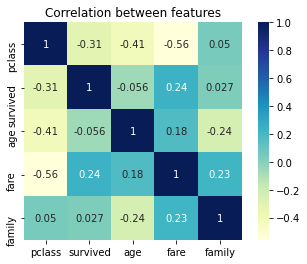

In [18]:
# As can be seen, the age feature is much more negatively correlated with the pclass than the fare feature.
import seaborn as sns
sns.heatmap(df.corr(), square=True,annot=True,cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
df.corr()


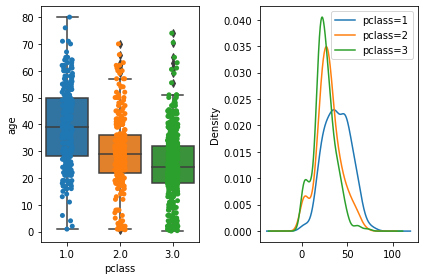

In [19]:
plt.subplot(1,2,1)
ax = sns.boxplot(x="pclass", y="age", data=df)
ax = sns.stripplot(x="pclass", y="age", data=df, jitter=True, edgecolor="gray")
plt.subplot(1,2,2)
df.age[df.pclass == 1].plot(kind='density')    
df.age[df.pclass == 2].plot(kind='density')
df.age[df.pclass == 3].plot(kind='density')
plt.legend(('pclass=1', 'pclass=2','pclass=3'))
plt.tight_layout()
plt.show()

It makes sense, when looking at the distribution shape on the right, to replace the missing age values with the average age value for the corresponding pclass.
The 'sex' feature has not yet been encoded as a numerical variable, we still need to check the distribution of that variable based on the class and the age features:

In [20]:
#Sex is less discriminant than the class the passenger is in, except for the first class.
# We will thus not use the sex feature for computing the median for the age.
df.groupby(['pclass','sex'])['age'].mean()


pclass  sex   
1.0     female    37.037594
        male      41.029250
2.0     female    27.499191
        male      30.815401
3.0     female    22.185307
        male      25.962273
Name: age, dtype: float64

In [21]:
# Replacing the missing values for the age with the corresponding average linked to the passenger's class:
df.age=df.groupby('pclass')['age'].apply(lambda x: x.fillna(x.mean()))

Finally, we need to get rid of the 'cabin' feature, as there are 78% of missing data.
Moreover, the cabin location on the boat is an important predictor of the survival rate, as being far away 
from the stairs diminishes the survival rate (although there were not enough life boats) <br>
<font color='red'>We do NOT have that information in the dataset.</font><br><br>
On another side, pclass is related to the cabin position (first class has cabins A,B,C, etc.)
so cabin is not really useful.

In [22]:
df["cabin"].isnull().sum()/df.shape[0]

df = df.drop(columns="cabin")

*Merging the Name column into a new column called title, containing the passengers prefix*

In [23]:
df['title'] = ''
df['title'] = df["name"].str.extract(' ([A-Za-z]+)\.', expand=False)
df['title'] = df['title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
df['title'] = df['title'].replace(['Mme'], 'Mrs')
df['title'] = df['title'].replace(['Mlle','Ms'], 'Miss')
df['title'] = df['title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
df['title'] = df['title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
df.loc[(df.sex == 'male')   & (df.title == 'Dr'),'title'] = 'Mr'
df.loc[(df.sex == 'female') & (df.title == 'Dr'),'title'] = 'Mrs'
# drop name column:
df = df.drop(columns=['name'])

df.sample(5)

,pclass,survived,sex,age,fare,embarked,family,title
583,2.0,1.0,female,40.0,15.7500,S,0.0,Mrs
393,2.0,0.0,male,25.0,31.5000,S,0.0,Mr
19,1.0,0.0,male,36.0,75.2417,C,0.0,Mr
103,1.0,1.0,female,38.0,227.5250,C,0.0,Miss
36,1.0,1.0,female,22.0,55.0000,S,1.0,Miss


 **<font color=blue>One Hot Encoding Process </font>** <br>
 It is time to encode the different text features:

In [24]:
df.dtypes
# As can be seen, sex and embarked ar string objects, so they need to be encoded.
# sex has two values, embarked has 3. We choose to use the one-hot-encoding method over the dictionary one.

pclass      float64
survived    float64
sex          object
age         float64
fare        float64
embarked     object
family      float64
title        object
dtype: object

and the encoding takes place here:

In [25]:
from sklearn.compose import make_column_selector as selector

# Get the numerical and categorical columns:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)
data_categorical = df[categorical_columns]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
#One-hot-encode the categorical columns.
array_hot_encoded = ohe.fit_transform(df[categorical_columns])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)
data_hot_encoded.columns = ohe.get_feature_names()
#Merge the numerical and one-hot-encoded categorical columns in the data dataframe:
data = pd.concat([df, data_hot_encoded], axis=1)
#Define feature and target columns:
y = data["survived"]
#X = data.drop(columns=["survived"])
X =data.drop(columns = categorical_columns)
#Saving the encoded data to disk
X.to_csv(r"~/Downloads/Xtitan.csv", index=False)
y.to_csv(r"~/Downloads/ytitan.csv", index=False)

Some analysis has been done under the Spyder environment. This is the reason why<br>
the X and y dataframes are loaded locally.

In [26]:
#Let's look at some sample data
X.sample(5)

,pclass,survived,age,fare,family,x0_female,x0_male,x1_C,x1_Q,x1_S,x2_Master,x2_Miss,x2_Mr,x2_Mrs,x2_Officer,x2_Royalty
256,1.0,1.0,39.159918,26.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
380,2.0,1.0,22.000000,10.5000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
805,3.0,1.0,24.816367,56.4958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
517,2.0,0.0,26.000000,13.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
209,1.0,1.0,30.000000,57.7500,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The correlations with the survival target variable are given here:

In [27]:
X.corr()["survived"]


pclass       -0.312469
survived      1.000000
age          -0.026736
fare          0.244479
family        0.026876
x0_female     0.528693
x0_male      -0.528693
x1_C          0.182123
x1_Q         -0.016071
x1_S         -0.150542
x2_Master     0.057436
x2_Miss       0.306269
x2_Mr        -0.528917
x2_Mrs        0.354660
x2_Officer   -0.040324
x2_Royalty    0.039762
Name: survived, dtype: float64

We can now get rid of the 'survived' variable:

In [28]:
X = X.drop(columns='survived')

Before dealing with the different ML models, let us take a look at the number of features which <br>
explain about 95% of the variance:

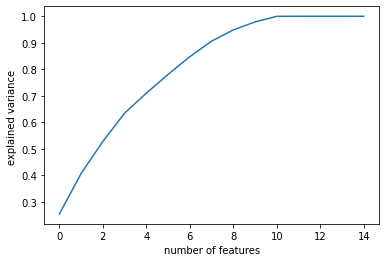

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA_model = PCA()
PCA_model.fit(X_scaled)
# Explained variance ratio
exp_var_ratio = PCA_model.explained_variance_ratio_

# Cumulative sum of the variance ratios
cumsum = np.cumsum(exp_var_ratio)

# Plotting number of components Vs explained variance ratio
plt.plot(cumsum)
_ = plt.xlabel('number of features')
_ = plt.ylabel('explained variance ')

We can see from the graph above that 2 features explain 50% of the variance, <br>
and we need about 8 features to explain 95% of it.

## <font color=blue>3. Selecting Different Models to predict the survival rate</font><br>
We are now ready to pursue the analysis by finding the 'best' machine learning model. <br>Two indicators will be used here:<br>
> the auc , because this is a binary classification and <br>
> the mean score, through cross validation. <br>


 #### <font color=color>3.1 Logistic Regression</font> <br><br>
 Let's search the best inverse of the regularisation parameter for the logistic regression model (C)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data, target = X, y

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

for C in [ 0.001, 0.05, 0.06,0.07,0.08,0.09, 0.1, 0.5, 1, 10, 100]:
    print('C=',C, end='\t\t')
    model = LogisticRegression(penalty='l2',C=C, solver='newton-cg', 
                               max_iter=1000)
    cv_results = cross_validate(model, X, y, cv=10, 
                       return_train_score=True)
    avg = cv_results['test_score'].mean()
    stdev = cv_results['test_score'].std()
    print(f"Mean = {avg:.3f}, \tStandard dev= {stdev:.3f}" )  
 


C= 0.001		Mean = 0.678, 	Standard dev= 0.085
C= 0.05		Mean = 0.791, 	Standard dev= 0.061
C= 0.06		Mean = 0.788, 	Standard dev= 0.063
C= 0.07		Mean = 0.787, 	Standard dev= 0.064
C= 0.08		Mean = 0.789, 	Standard dev= 0.061
C= 0.09		Mean = 0.789, 	Standard dev= 0.061
C= 0.1		Mean = 0.791, 	Standard dev= 0.059
C= 0.5		Mean = 0.781, 	Standard dev= 0.070
C= 1		Mean = 0.781, 	Standard dev= 0.070
C= 10		Mean = 0.778, 	Standard dev= 0.072
C= 100		Mean = 0.779, 	Standard dev= 0.071


The best value is obtained for C=0.05 This means that the model is originally overfitting and we increase the regularization strength which will underfit the data.

In [31]:
from sklearn.metrics import roc_auc_score

model = LogisticRegression(penalty='l2',C=0.05, solver='newton-cg', 
                               max_iter=1000)
model.fit(data_train, target_train)
y_predict = model.predict_proba(data_test)
ras = roc_auc_score(target_test, y_predict[:,1])
print(f"\nROC AUC SCORE={ras:.3f}")


ROC AUC SCORE=0.853


#### <font color=red>3.2 Decision Tree Classifier </font>


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

for i in range(1,10):    
    for j in range(5,100,1):
        tree=DecisionTreeClassifier(max_depth=i)
        cv_results_tree = cross_validate(    tree, data, target, cv=j)
        avg = cv_results_tree["test_score"].mean()
        stdev = cv_results_tree["test_score"].std()
        print(f"Tree depth={i}\tCV=={j}\tMean={avg:.3f}\tStd Dev={stdev:.3f}")

Tree depth=1	CV==5	Mean=0.770	Std Dev=0.048
Tree depth=1	CV==6	Mean=0.772	Std Dev=0.061
Tree depth=1	CV==7	Mean=0.765	Std Dev=0.067
Tree depth=1	CV==8	Mean=0.768	Std Dev=0.077
Tree depth=1	CV==9	Mean=0.765	Std Dev=0.076
Tree depth=1	CV==10	Mean=0.769	Std Dev=0.058
Tree depth=1	CV==11	Mean=0.765	Std Dev=0.075
Tree depth=1	CV==12	Mean=0.764	Std Dev=0.073
Tree depth=1	CV==13	Mean=0.766	Std Dev=0.094
Tree depth=1	CV==14	Mean=0.764	Std Dev=0.082
Tree depth=1	CV==15	Mean=0.763	Std Dev=0.082
Tree depth=1	CV==16	Mean=0.765	Std Dev=0.085
Tree depth=1	CV==17	Mean=0.765	Std Dev=0.090
Tree depth=1	CV==18	Mean=0.764	Std Dev=0.089
Tree depth=1	CV==19	Mean=0.764	Std Dev=0.088
Tree depth=1	CV==20	Mean=0.764	Std Dev=0.089
Tree depth=1	CV==21	Mean=0.762	Std Dev=0.090
Tree depth=1	CV==22	Mean=0.764	Std Dev=0.094
Tree depth=1	CV==23	Mean=0.762	Std Dev=0.097
Tree depth=1	CV==24	Mean=0.762	Std Dev=0.091
Tree depth=1	CV==25	Mean=0.763	Std Dev=0.108
Tree depth=1	CV==26	Mean=0.760	Std Dev=0.102
Tree depth=1	CV

Tree depth=2	CV==93	Mean=0.786	Std Dev=0.135
Tree depth=2	CV==94	Mean=0.791	Std Dev=0.137
Tree depth=2	CV==95	Mean=0.785	Std Dev=0.142
Tree depth=2	CV==96	Mean=0.783	Std Dev=0.150
Tree depth=2	CV==97	Mean=0.786	Std Dev=0.144
Tree depth=2	CV==98	Mean=0.786	Std Dev=0.144
Tree depth=2	CV==99	Mean=0.789	Std Dev=0.144
Tree depth=3	CV==5	Mean=0.700	Std Dev=0.116
Tree depth=3	CV==6	Mean=0.707	Std Dev=0.131
Tree depth=3	CV==7	Mean=0.726	Std Dev=0.108
Tree depth=3	CV==8	Mean=0.727	Std Dev=0.125
Tree depth=3	CV==9	Mean=0.734	Std Dev=0.114
Tree depth=3	CV==10	Mean=0.771	Std Dev=0.109
Tree depth=3	CV==11	Mean=0.756	Std Dev=0.117
Tree depth=3	CV==12	Mean=0.738	Std Dev=0.116
Tree depth=3	CV==13	Mean=0.780	Std Dev=0.086
Tree depth=3	CV==14	Mean=0.807	Std Dev=0.075
Tree depth=3	CV==15	Mean=0.794	Std Dev=0.071
Tree depth=3	CV==16	Mean=0.805	Std Dev=0.077
Tree depth=3	CV==17	Mean=0.808	Std Dev=0.077
Tree depth=3	CV==18	Mean=0.803	Std Dev=0.087
Tree depth=3	CV==19	Mean=0.806	Std Dev=0.067
Tree depth=3	CV

Tree depth=4	CV==86	Mean=0.784	Std Dev=0.132
Tree depth=4	CV==87	Mean=0.796	Std Dev=0.131
Tree depth=4	CV==88	Mean=0.791	Std Dev=0.124
Tree depth=4	CV==89	Mean=0.789	Std Dev=0.130
Tree depth=4	CV==90	Mean=0.793	Std Dev=0.137
Tree depth=4	CV==91	Mean=0.785	Std Dev=0.142
Tree depth=4	CV==92	Mean=0.787	Std Dev=0.143
Tree depth=4	CV==93	Mean=0.792	Std Dev=0.142
Tree depth=4	CV==94	Mean=0.796	Std Dev=0.136
Tree depth=4	CV==95	Mean=0.793	Std Dev=0.128
Tree depth=4	CV==96	Mean=0.790	Std Dev=0.136
Tree depth=4	CV==97	Mean=0.792	Std Dev=0.134
Tree depth=4	CV==98	Mean=0.790	Std Dev=0.135
Tree depth=4	CV==99	Mean=0.791	Std Dev=0.136
Tree depth=5	CV==5	Mean=0.706	Std Dev=0.128
Tree depth=5	CV==6	Mean=0.708	Std Dev=0.135
Tree depth=5	CV==7	Mean=0.731	Std Dev=0.131
Tree depth=5	CV==8	Mean=0.726	Std Dev=0.135
Tree depth=5	CV==9	Mean=0.728	Std Dev=0.145
Tree depth=5	CV==10	Mean=0.765	Std Dev=0.094
Tree depth=5	CV==11	Mean=0.745	Std Dev=0.110
Tree depth=5	CV==12	Mean=0.746	Std Dev=0.107
Tree depth=5	CV

Tree depth=6	CV==79	Mean=0.792	Std Dev=0.116
Tree depth=6	CV==80	Mean=0.790	Std Dev=0.116
Tree depth=6	CV==81	Mean=0.794	Std Dev=0.119
Tree depth=6	CV==82	Mean=0.789	Std Dev=0.123
Tree depth=6	CV==83	Mean=0.791	Std Dev=0.118
Tree depth=6	CV==84	Mean=0.790	Std Dev=0.129
Tree depth=6	CV==85	Mean=0.785	Std Dev=0.144
Tree depth=6	CV==86	Mean=0.783	Std Dev=0.130
Tree depth=6	CV==87	Mean=0.784	Std Dev=0.128
Tree depth=6	CV==88	Mean=0.784	Std Dev=0.124
Tree depth=6	CV==89	Mean=0.786	Std Dev=0.130
Tree depth=6	CV==90	Mean=0.786	Std Dev=0.131
Tree depth=6	CV==91	Mean=0.782	Std Dev=0.134
Tree depth=6	CV==92	Mean=0.785	Std Dev=0.130
Tree depth=6	CV==93	Mean=0.788	Std Dev=0.136
Tree depth=6	CV==94	Mean=0.787	Std Dev=0.137
Tree depth=6	CV==95	Mean=0.790	Std Dev=0.125
Tree depth=6	CV==96	Mean=0.790	Std Dev=0.129
Tree depth=6	CV==97	Mean=0.786	Std Dev=0.130
Tree depth=6	CV==98	Mean=0.792	Std Dev=0.124
Tree depth=6	CV==99	Mean=0.794	Std Dev=0.133
Tree depth=7	CV==5	Mean=0.660	Std Dev=0.090
Tree depth=

Tree depth=8	CV==72	Mean=0.775	Std Dev=0.120
Tree depth=8	CV==73	Mean=0.773	Std Dev=0.120
Tree depth=8	CV==74	Mean=0.769	Std Dev=0.113
Tree depth=8	CV==75	Mean=0.779	Std Dev=0.115
Tree depth=8	CV==76	Mean=0.781	Std Dev=0.110
Tree depth=8	CV==77	Mean=0.779	Std Dev=0.120
Tree depth=8	CV==78	Mean=0.780	Std Dev=0.131
Tree depth=8	CV==79	Mean=0.775	Std Dev=0.125
Tree depth=8	CV==80	Mean=0.772	Std Dev=0.122
Tree depth=8	CV==81	Mean=0.775	Std Dev=0.122
Tree depth=8	CV==82	Mean=0.778	Std Dev=0.132
Tree depth=8	CV==83	Mean=0.776	Std Dev=0.133
Tree depth=8	CV==84	Mean=0.781	Std Dev=0.134
Tree depth=8	CV==85	Mean=0.778	Std Dev=0.141
Tree depth=8	CV==86	Mean=0.770	Std Dev=0.134
Tree depth=8	CV==87	Mean=0.780	Std Dev=0.134
Tree depth=8	CV==88	Mean=0.772	Std Dev=0.124
Tree depth=8	CV==89	Mean=0.774	Std Dev=0.128
Tree depth=8	CV==90	Mean=0.767	Std Dev=0.133
Tree depth=8	CV==91	Mean=0.767	Std Dev=0.140
Tree depth=8	CV==92	Mean=0.765	Std Dev=0.140
Tree depth=8	CV==93	Mean=0.769	Std Dev=0.139
Tree depth

 > Best performance obtained with a depth level of 3 (CV=52)<br>
 > <font color=blue>Tree depth=3	CV==52	Mean=0.809	Std Dev=0.108</font>
 <br>
> Which features have been used ?

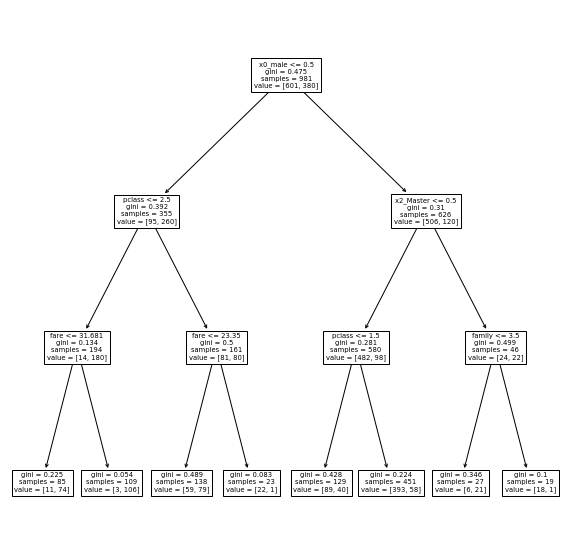

In [33]:
from sklearn.model_selection import train_test_split
# test size =25% by default
tree=DecisionTreeClassifier(max_depth=3)
data_train, data_test, target_train, target_test = train_test_split(
    X,y, random_state=0)
tree.fit(data_train, target_train)
y_predict = tree.predict(pd.DataFrame(data_test))

from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree, ax=ax, feature_names=data.columns)


In [34]:
from sklearn.metrics import roc_auc_score

tree=DecisionTreeClassifier(max_depth=3)
model.fit(data_train, target_train)
y_predict = model.predict_proba(data_test)
ras = roc_auc_score(target_test, y_predict[:,1])
print(f"\nROC AUC SCORE={ras:.3f}")


ROC AUC SCORE=0.853


#### <font color=red>3.3 Bagged Randomized Decision Trees </font>


In [35]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

for md in range(1,11,1):
    for ne in range(1,101,10):
        bagged_trees = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=md),
            n_estimators=50,
        )
        bagged_trees.fit(data_train, target_train)
        y_predict = bagged_trees.predict(data_test)
        
        cv_results = cross_validate(bagged_trees, data, target, cv=10, 
                               return_train_score=True)
        avg = cv_results['test_score'].mean()
        stdev = cv_results['test_score'].std()
        print(f"Max depth= {md}\tNumber of estimators={ne}\t Mean = {avg:.3f}, \tStandard dev=' {stdev:.3f}" )  
#Max depth= 9	Number of estimators=1	 Mean = 0.785, 	Standard dev=' 0.074


Max depth= 1	Number of estimators=1	 Mean = 0.772, 	Standard dev=' 0.061
Max depth= 1	Number of estimators=11	 Mean = 0.776, 	Standard dev=' 0.063
Max depth= 1	Number of estimators=21	 Mean = 0.769, 	Standard dev=' 0.059
Max depth= 1	Number of estimators=31	 Mean = 0.772, 	Standard dev=' 0.061
Max depth= 1	Number of estimators=41	 Mean = 0.774, 	Standard dev=' 0.061
Max depth= 1	Number of estimators=51	 Mean = 0.772, 	Standard dev=' 0.061
Max depth= 1	Number of estimators=61	 Mean = 0.772, 	Standard dev=' 0.052
Max depth= 1	Number of estimators=71	 Mean = 0.772, 	Standard dev=' 0.061
Max depth= 1	Number of estimators=81	 Mean = 0.778, 	Standard dev=' 0.055
Max depth= 1	Number of estimators=91	 Mean = 0.778, 	Standard dev=' 0.058
Max depth= 2	Number of estimators=1	 Mean = 0.710, 	Standard dev=' 0.142
Max depth= 2	Number of estimators=11	 Mean = 0.718, 	Standard dev=' 0.148
Max depth= 2	Number of estimators=21	 Mean = 0.706, 	Standard dev=' 0.139
Max depth= 2	Number of estimators=31	 Me

Max results for:
Max depth= 9	Number of estimators=1	 Mean = 0.785, 	Standard dev=' 0.074


In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=9),
            n_estimators=1,
        )
model.fit(data_train, target_train)
y_predict = model.predict_proba(data_test)
ras = roc_auc_score(target_test, y_predict[:,1])
print(f"\nROC AUC SCORE={ras:.3f}")


ROC AUC SCORE=0.784


Not that good.

#### <font color=red> 3.4 Random Forests </font>


In [37]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
for d in range(1,10):    
    for j in range(5,105,5):
        rf_regressor = RandomForestClassifier(n_estimators=j, max_depth = d)
        cv_results_tree = cross_validate(rf_regressor, data, target, cv=20)
        avg = cv_results_tree["test_score"].mean()
        stdev = cv_results_tree["test_score"].std()
        print(f"Random forest classifier: {j}\t"
              f"Max depth: {d}\t"
              f"{avg:.3f} +/- "
              f"{stdev:.3f}")



Random forest classifier: 5	Max depth: 1	0.742 +/- 0.087
Random forest classifier: 10	Max depth: 1	0.766 +/- 0.084
Random forest classifier: 15	Max depth: 1	0.782 +/- 0.078
Random forest classifier: 20	Max depth: 1	0.776 +/- 0.080
Random forest classifier: 25	Max depth: 1	0.781 +/- 0.079
Random forest classifier: 30	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 35	Max depth: 1	0.771 +/- 0.083
Random forest classifier: 40	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 45	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 50	Max depth: 1	0.770 +/- 0.087
Random forest classifier: 55	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 60	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 65	Max depth: 1	0.780 +/- 0.079
Random forest classifier: 70	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 75	Max depth: 1	0.777 +/- 0.084
Random forest classifier: 80	Max depth: 1	0.780 +/- 0.077
Random forest classifier: 85	Max depth: 1	0.780 +/- 0.077
Random forest c

Random forest classifier: 15	Max depth: 8	0.802 +/- 0.086
Random forest classifier: 20	Max depth: 8	0.792 +/- 0.097
Random forest classifier: 25	Max depth: 8	0.808 +/- 0.093
Random forest classifier: 30	Max depth: 8	0.797 +/- 0.088
Random forest classifier: 35	Max depth: 8	0.793 +/- 0.086
Random forest classifier: 40	Max depth: 8	0.796 +/- 0.096
Random forest classifier: 45	Max depth: 8	0.800 +/- 0.082
Random forest classifier: 50	Max depth: 8	0.797 +/- 0.094
Random forest classifier: 55	Max depth: 8	0.794 +/- 0.093
Random forest classifier: 60	Max depth: 8	0.805 +/- 0.088
Random forest classifier: 65	Max depth: 8	0.797 +/- 0.088
Random forest classifier: 70	Max depth: 8	0.800 +/- 0.088
Random forest classifier: 75	Max depth: 8	0.801 +/- 0.088
Random forest classifier: 80	Max depth: 8	0.797 +/- 0.091
Random forest classifier: 85	Max depth: 8	0.799 +/- 0.084
Random forest classifier: 90	Max depth: 8	0.800 +/- 0.084
Random forest classifier: 95	Max depth: 8	0.797 +/- 0.089
Random forest 

The best values are obtained when the number of estimators is around 85-100 with a  Max depth = 4<br>
<font color=blue>Random forest classifier: 60	Max depth 4:	0.810 +/- 0.082 </font> <br>
(Results may vary as process is purely random here)

And the roc_auc score is pretty good

In [39]:
from sklearn.metrics import roc_auc_score

rf_regressor = RandomForestClassifier(n_estimators=45, max_depth=4)
rf_regressor.fit(data_train, target_train)
y_predict = rf_regressor.predict_proba(data_test)
ras = roc_auc_score(target_test, y_predict[:,1])
print(f"\nROC AUC SCORE={ras:.3f}")


ROC AUC SCORE=0.850


**Let's take a look at the min_leaf_node parameter:**

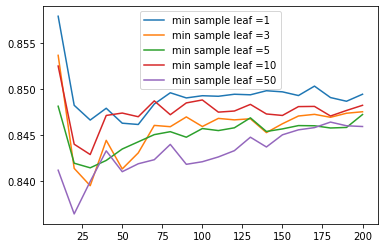

In [41]:
# Code from Alexey Gregorev 
scores=[]
col=['min_sample_leaf','n_estimators','auc']
for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=4,
                                    min_samples_leaf=s, random_state=1
                                    )
        rf.fit(data_train, target_train)
        y_pred = rf.predict_proba(data_test)[:,1]
        score = roc_auc_score(target_test, y_pred)
        scores.append((s,n,score))
frame = pd.DataFrame(scores)
frame.columns = col

for s in [1,3,5,10,50]:
    df_subset = frame[frame.min_sample_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'min sample leaf =%d'%s)
    plt.legend()


As can be seen from the above figure, min sample leaf = 1 optimizes the ROC AUC.<br>
This is in fact the default value for that parameter, so it will not be considered anymore. <br>
Note that random_state has been fixed to 1.

Sample Leaf Size: 1	0.807 +/- 0.074
Sample Leaf Size: 3	0.805 +/- 0.077
Sample Leaf Size: 5	0.804 +/- 0.081
Sample Leaf Size: 10	0.808 +/- 0.075
Sample Leaf Size: 30	0.804 +/- 0.078
Sample Leaf Size: 50	0.804 +/- 0.079
Sample Leaf Size: 75	0.806 +/- 0.077
Sample Leaf Size: 100	0.797 +/- 0.076
Sample Leaf Size: 125	0.800 +/- 0.076
Sample Leaf Size: 150	0.802 +/- 0.081
Sample Leaf Size: 175	0.807 +/- 0.078
Sample Leaf Size: 200	0.807 +/- 0.080


#### <font color=red> 3.5 XGBOOST </font>


In [ ]:
# First search the optimal learning rate: 

In [42]:
import xgboost as xgb
scores=[]
features = data.columns
dtrain = xgb.DMatrix(data_train, target_train, feature_names=features)
dtest = xgb.DMatrix(data_test, target_test, feature_names=features)
watchlist=[(dtrain, 'train'),(dtest,'test')]
for e in [0.01,0.02,0.03,0.04,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.5,1,3,10]:

            xgb_params = {
                'eta':e,
                'objective':'binary:logistic',
                'eval_metric':'auc',
                'seed':1,
                'verbosity':0
                }
            
            model = xgb.train(xgb_params, dtrain, num_boost_round=200)
            y_predict = model.predict(dtest)
            auc = roc_auc_score(target_test, y_predict)
            score = ((y_predict>=0.5)==target_test).mean()
            scores.append((e,d,score,auc))
            print(f"Eta:{e}\t\tScore:{score:.3f}\tAUC={auc:.3f}")
      

Eta:0.01		Score:0.811	AUC=0.848
Eta:0.02		Score:0.814	AUC=0.848
Eta:0.03		Score:0.817	AUC=0.847
Eta:0.04		Score:0.817	AUC=0.847
Eta:0.06		Score:0.817	AUC=0.850
Eta:0.07		Score:0.811	AUC=0.850
Eta:0.08		Score:0.826	AUC=0.853
Eta:0.09		Score:0.823	AUC=0.851
Eta:0.1		Score:0.808	AUC=0.848
Eta:0.2		Score:0.805	AUC=0.849
Eta:0.3		Score:0.805	AUC=0.850
Eta:0.5		Score:0.787	AUC=0.845
Eta:1		Score:0.787	AUC=0.834
Eta:3		Score:0.750	AUC=0.748
Eta:10		Score:0.771	AUC=0.751


<font color='blue'>The best value for the learning rate is obtained with eta =0.08 <br>
Let's look at the depth hyperparamter now:</font>

In [43]:
import xgboost as xgb
scores=[]
features = data.columns
dtrain = xgb.DMatrix(data_train, target_train, feature_names=features)
dtest = xgb.DMatrix(data_test, target_test, feature_names=features)
watchlist=[(dtrain, 'train'),(dtest,'test')]
for e in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.3, 0.5,1,5,10]:
    for d in range(1,10):
        xgb_params = {
            'eta':e,
            'max_depth': d,
            'min_child_weight':1,
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'seed':1,
            'verbosity':0
            }
        
        model = xgb.train(xgb_params, dtrain, num_boost_round=200)
        y_predict = model.predict(dtest)
        auc = roc_auc_score(target_test, y_predict)
        score = ((y_predict>=0.5)==target_test).mean()
        scores.append((e,d,score,auc))
        print(f"Eta ={e}\tDepth:{d}\tScore:{score:.3f}\tAUC={auc:.3f}")
## Get teh results in a dataframe:
Scores = pd.DataFrame(scores)
Scores.columns = ['eta','depth','mean','auc']

Scores.describe()
# And look at the maximum score for the mean
Scores[Scores['mean']==Scores['mean'].max()]

Eta =0.01	Depth:1	Score:0.774	AUC=0.842
Eta =0.01	Depth:2	Score:0.805	AUC=0.850
Eta =0.01	Depth:3	Score:0.814	AUC=0.855
Eta =0.01	Depth:4	Score:0.811	AUC=0.852
Eta =0.01	Depth:5	Score:0.808	AUC=0.851
Eta =0.01	Depth:6	Score:0.811	AUC=0.848
Eta =0.01	Depth:7	Score:0.814	AUC=0.846
Eta =0.01	Depth:8	Score:0.805	AUC=0.838
Eta =0.01	Depth:9	Score:0.811	AUC=0.835
Eta =0.02	Depth:1	Score:0.796	AUC=0.852
Eta =0.02	Depth:2	Score:0.805	AUC=0.850
Eta =0.02	Depth:3	Score:0.820	AUC=0.851
Eta =0.02	Depth:4	Score:0.811	AUC=0.848
Eta =0.02	Depth:5	Score:0.814	AUC=0.847
Eta =0.02	Depth:6	Score:0.814	AUC=0.848
Eta =0.02	Depth:7	Score:0.814	AUC=0.843
Eta =0.02	Depth:8	Score:0.817	AUC=0.840
Eta =0.02	Depth:9	Score:0.820	AUC=0.839
Eta =0.03	Depth:1	Score:0.805	AUC=0.852
Eta =0.03	Depth:2	Score:0.814	AUC=0.846
Eta =0.03	Depth:3	Score:0.826	AUC=0.852
Eta =0.03	Depth:4	Score:0.823	AUC=0.847
Eta =0.03	Depth:5	Score:0.823	AUC=0.845
Eta =0.03	Depth:6	Score:0.817	AUC=0.847
Eta =0.03	Depth:7	Score:0.817	AUC=0.847


,eta,depth,mean,auc
34,0.04,8,0.829268,0.844271
35,0.04,9,0.829268,0.847075


#### <font color='blue'> The base value for the survival rate is for eta=0.04 and max depth=8. <br>
The results is slightly better than the one above.
Let's now look at the min child rate:</font>

In [47]:
scores=[]
features = data.columns
dtrain = xgb.DMatrix(data_train, target_train, feature_names=features)
dtest = xgb.DMatrix(data_test, target_test, feature_names=features)
watchlist=[(dtrain, 'train'),(dtest,'test')]
for e in [0.04, 0.08]:
    for d in range(5,9):
        for m in range(1,20):
            xgb_params = {
                'eta':e,
                'max_depth': d,
                'min_child_weight':m,
                'objective':'binary:logistic',
                'eval_metric':'auc',
                'seed':1,
                'verbosity':0
                }
            
            model = xgb.train(xgb_params, dtrain, num_boost_round=200)
            y_predict = model.predict(dtest)
            auc = roc_auc_score(target_test, y_predict)
            score = ((y_predict>=0.5)==target_test).mean()
            scores.append((e,d,m, score,auc))
            print(f"Eta:{e}\tMax Depth:{d}\tMin Child Weight:{m}\tScore:{score:.3f}\tAUC={auc:.3f}")

Eta:0.04	Max Depth:5	Min Child Weight:1	Score:0.811	AUC=0.846
Eta:0.04	Max Depth:5	Min Child Weight:2	Score:0.820	AUC=0.842
Eta:0.04	Max Depth:5	Min Child Weight:3	Score:0.826	AUC=0.846
Eta:0.04	Max Depth:5	Min Child Weight:4	Score:0.817	AUC=0.845
Eta:0.04	Max Depth:5	Min Child Weight:5	Score:0.820	AUC=0.857
Eta:0.04	Max Depth:5	Min Child Weight:6	Score:0.817	AUC=0.855
Eta:0.04	Max Depth:5	Min Child Weight:7	Score:0.829	AUC=0.852
Eta:0.04	Max Depth:5	Min Child Weight:8	Score:0.826	AUC=0.852
Eta:0.04	Max Depth:5	Min Child Weight:9	Score:0.826	AUC=0.859
Eta:0.04	Max Depth:5	Min Child Weight:10	Score:0.823	AUC=0.858
Eta:0.04	Max Depth:5	Min Child Weight:11	Score:0.817	AUC=0.854
Eta:0.04	Max Depth:5	Min Child Weight:12	Score:0.814	AUC=0.854
Eta:0.04	Max Depth:5	Min Child Weight:13	Score:0.811	AUC=0.855
Eta:0.04	Max Depth:5	Min Child Weight:14	Score:0.811	AUC=0.854
Eta:0.04	Max Depth:5	Min Child Weight:15	Score:0.814	AUC=0.853
Eta:0.04	Max Depth:5	Min Child Weight:16	Score:0.817	AUC=0.854
E

Eta:0.08	Max Depth:7	Min Child Weight:19	Score:0.811	AUC=0.850
Eta:0.08	Max Depth:8	Min Child Weight:1	Score:0.811	AUC=0.848
Eta:0.08	Max Depth:8	Min Child Weight:2	Score:0.811	AUC=0.853
Eta:0.08	Max Depth:8	Min Child Weight:3	Score:0.811	AUC=0.853
Eta:0.08	Max Depth:8	Min Child Weight:4	Score:0.811	AUC=0.856
Eta:0.08	Max Depth:8	Min Child Weight:5	Score:0.814	AUC=0.861
Eta:0.08	Max Depth:8	Min Child Weight:6	Score:0.826	AUC=0.859
Eta:0.08	Max Depth:8	Min Child Weight:7	Score:0.826	AUC=0.863
Eta:0.08	Max Depth:8	Min Child Weight:8	Score:0.826	AUC=0.856
Eta:0.08	Max Depth:8	Min Child Weight:9	Score:0.823	AUC=0.858
Eta:0.08	Max Depth:8	Min Child Weight:10	Score:0.823	AUC=0.860
Eta:0.08	Max Depth:8	Min Child Weight:11	Score:0.823	AUC=0.858
Eta:0.08	Max Depth:8	Min Child Weight:12	Score:0.820	AUC=0.855
Eta:0.08	Max Depth:8	Min Child Weight:13	Score:0.820	AUC=0.858
Eta:0.08	Max Depth:8	Min Child Weight:14	Score:0.820	AUC=0.859
Eta:0.08	Max Depth:8	Min Child Weight:15	Score:0.823	AUC=0.856
E

In [49]:
Scores = pd.DataFrame(scores)
Scores.columns = ['eta','depth','min child leaf','mean','auc']

Scores.describe()
# And look at the maximum score for the mean
Scores[Scores['mean']==Scores['mean'].max()]

,eta,depth,min child leaf,mean,auc
44,0.04,7,7,0.832317,0.853045
64,0.04,8,8,0.832317,0.853345


**<font color='blue'>
The optimal hyperparameter values are thus: <br>
eta=0.04<br>
max_depth=8 and <br>
min child weight=8</font>**

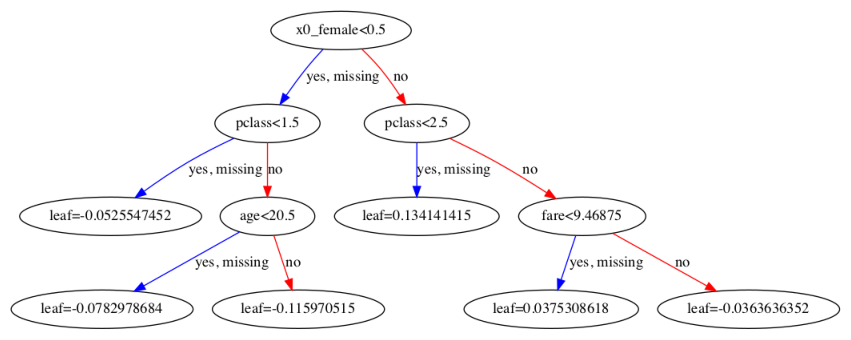

In [56]:
#print(model.feature_importances_)
#plot_importance(model)
#pyplot.show()
from xgboost import  plot_tree
_, ax = plt.subplots(figsize=(15, 15))
plot_tree(model, ax=ax); plt.show()

### <font color='red'>4. Conclusions</font>  <br><br>
Here is a summary of the models results:<br>

| Model | mean score | AUC 
| --- | --- | --- |
| Logistic Regression | 0.791 | .853 |
| Bagged Trees | 0.785 | .784 |
| Decision Trees | 0.809| .853 |
| Random Forests | 0.810 | .850 |
| XGBoost | 0.832 | .853 |

The best scores are obtained with the XGBoost model, with the hyperparameters learning rate (eta)=0.04, <br>
max_depth=8 and a min_child_leaf of 8. 


The models are considered by Kaggle as correctly performing if their average fit score is around 80%. The last three models above verify that criteria, with a leading edge for the XGBoost model.

The last model will be the one deployed.
